<a href="https://colab.research.google.com/github/146790g/MNIST_2CNN/blob/master/MNIST_2CNN_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST_2CNN_Feature_Extraction

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow2.x.

In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

## データの読み込み


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
print(train_images[0].shape)

(784,)


## モデルの読み込み

In [ ]:
result_dir = '/content/gdrive/My Drive/Colab Notebooks/MNIST/results'  
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

model=load_model(os.path.join(result_dir,'MNIST_double_CNN.h5'))

model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv_filter2 (Conv2D)        (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3

## 特徴量の抽出


In [ ]:
x=test_images[0]
x2 = np.expand_dims(x, axis=0)


layer_outputs = [model.get_layer('flatten').output,
                 model.get_layer('hidden').output]

model2 = models.Model(inputs=model.input, outputs=layer_outputs)

flatten_output, hidden_output = model2.predict(x2)

print(flatten_output.shape)
print(hidden_output.shape)




(1, 3136)
(1, 1024)


## Validation Dataの画像すべてに対して、その特徴量データを取得する
その特徴量データを、featureと命名する



In [ ]:

flatten_output, hidden_output = model2.predict(test_images)

print(flatten_output.shape)
print(hidden_output.shape)
print(type(hidden_output))
print(hidden_output[1].shape)

feature=hidden_output

print(feature.shape)

(10000, 3136)
(10000, 1024)
<class 'numpy.ndarray'>
(1024,)
(10000, 1024)


## 特徴量データに基づいて、tSNEプロットを作成する

In [26]:
from sklearn.manifold import TSNE
digits2d = TSNE(n_components=2).fit_transform(feature)

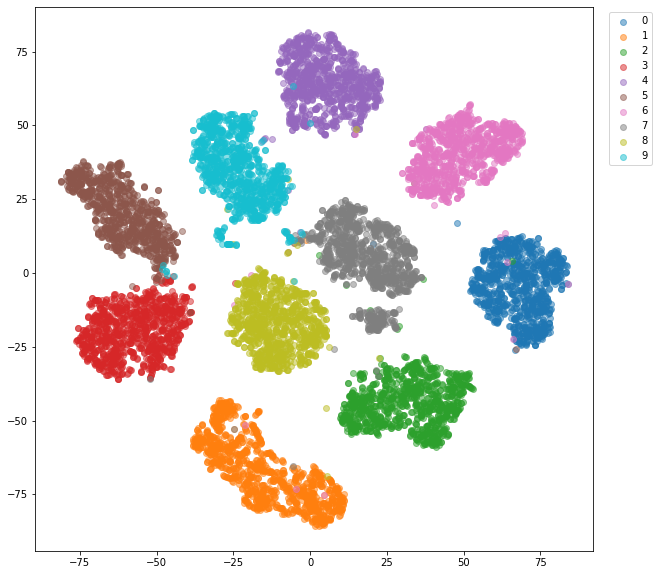

In [27]:
from matplotlib import pylab as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

f, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in range(10):
    target = digits2d[test_labels == i]
    ax.scatter(x=target[:, 0], y=target[:, 1], label=str(i), alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

【考察】

2層CNNモデルのうち、１０２４次元の縮約データを抽出してきて、それらに対して、t-SNEによって、2次元プロットを作成したところ、数字の０～９までに応じて、的確に
分類されたことが視察的に確認された。